In [1]:
# Add Matplotlib inline magic command.
%matplotlib inline
# Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data_challenge.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [8]:
# Get the total number of rides for each city type.
total_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# Get the total number of rides for all cities.
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [10]:
# Get the total number of drivers by city type. Corrected the use of city_data_df instead of pyber_data_df to get the right count.
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
# Get the total number of drivers. Corrected the use of city_data_df instead of pyber_data_df to get the correct count.
total_drivers = city_data_df["driver_count"].sum()
total_drivers

2973

In [12]:
# Calculate the average fare per ride.
average_ride_fare_by_type = sum_fares_by_type / total_rides_by_type
average_ride_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
# Calculate the average fare per driver.
average_driver_fare_by_type = sum_fares_by_type / total_drivers_by_type
average_driver_fare_by_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
pyber_data_summary_df = pd.DataFrame({
    "Total Rides": total_rides_by_type,
    "Total Drivers": total_drivers_by_type,
    "Total Fares": sum_fares_by_type,
    "Average Fare per Ride": average_ride_fare_by_type,
    "Average Fare per Driver": average_driver_fare_by_type})
pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [15]:
# Delete the index name.
del pyber_data_summary_df.index.name
pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [16]:
# Format the Total Rides and Total Drivers with thousands separator.
pyber_data_summary_df["Total Rides"] = pyber_data_summary_df["Total Rides"].map("{:,}".format)
pyber_data_summary_df["Total Drivers"] = pyber_data_summary_df["Total Drivers"].map("{:,}".format)

# Format all fare values to use $ and two decimal places.
pyber_data_summary_df["Total Fares"] = pyber_data_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Ride"] = pyber_data_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Driver"] = pyber_data_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [17]:
# Rename columns to use capitals and remove underscore.
pyber_data_df = pyber_data_df.rename(columns={"city":"City", "date":"Date", "fare":"Fare", "ride_id":"Ride Id", "driver_count":"No. Drivers", "type":"City Type"})
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Set the Date column to the datetime data type.
pyber_data_df["Date"] = pd.to_datetime(pyber_data_df["Date"])
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
City           2375 non-null object
Date           2375 non-null datetime64[ns]
Fare           2375 non-null float64
Ride Id        2375 non-null int64
No. Drivers    2375 non-null int64
City Type      2375 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 129.9+ KB


In [19]:
# Set the index to the Date column.
pyber_data_df = pyber_data_df.set_index(["Date"])
pyber_data_df

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [20]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 5 columns):
City           2375 non-null object
Fare           2375 non-null float64
Ride Id        2375 non-null int64
No. Drivers    2375 non-null int64
City Type      2375 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 111.3+ KB


In [21]:
# Calculate the sum of the fares by city type and date.
sum_of_fares = pyber_data_df.groupby(["City Type", "Date"]).sum()["Fare"]
sum_of_fares

City Type  Date               
Rural      2019-01-01 09:45:36    43.69
           2019-01-02 11:18:32    52.12
           2019-01-03 19:51:01    19.90
           2019-01-04 03:31:26    24.88
           2019-01-06 07:38:40    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:49    18.45
           2019-05-08 07:29:01    18.55
           2019-05-08 11:38:35    19.77
           2019-05-08 13:10:18    18.04
Name: Fare, Length: 2375, dtype: float64

In [22]:
# Convert the Series to a DataFrame and reset the index.
sum_of_fares_df = sum_of_fares.to_frame().reset_index()
sum_of_fares_df.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [23]:
# Create a pivot table DataFrame with Date as index.
fares_table = pd.pivot_table(sum_of_fares_df, index='Date', columns='City Type')
fares_table

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [24]:
# Create a DataFrame for dates 2019-01-01 to 2019-04-28.
weekly_fares_table_df = fares_table.loc[pd.Timestamp('2019-01-01'):pd.Timestamp('2019-04-29')]
weekly_fares_table_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [25]:
# Create new DataFrame with weekly bins and find sum of fares.
weekly_fares_table_df = weekly_fares_table_df.resample('W').sum()
weekly_fares_table_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1357.75  2238.29

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


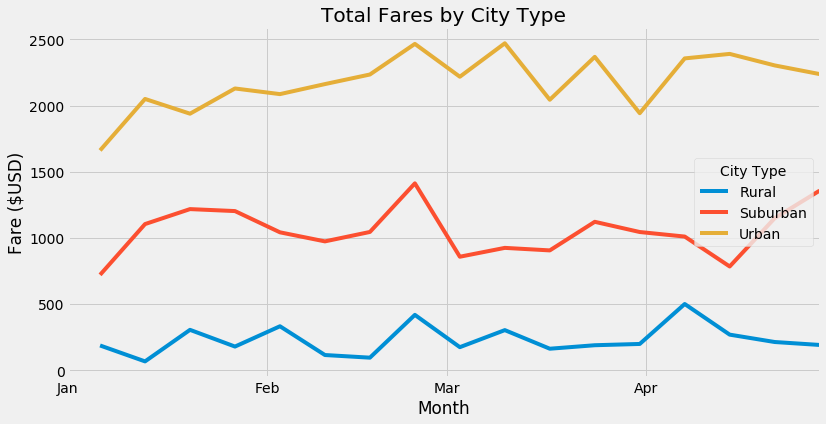

In [26]:
# Set months.
import matplotlib.dates as mdates
months = mdates.MonthLocator()
month_fmt = mdates.DateFormatter('%b')

# Create multi-lined line plot
line_labels = ["Rural", "Suburban", "Urban"]
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(weekly_fares_table_df)
ax.set_title("Total Fares by City Type")
ax.set_xlim('2019-01-01','2019-04-28')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_fmt)
ax.set_xlabel("Month")
ax.set_ylabel("Fare ($USD)")
ax.legend(line_labels, loc='best', title="City Type")
# Save the figure.
plt.savefig("analysis/Fig8.png")
plt.show()